# Trip time comparison

Ebben a notebook-ban beolvasom mind az irányítatlan, mind pedig az elosztottan irányított szimulációból nyert triptime fájlokat és a duration oszlopok értékeinek, tehát a megtett utak idejének az átlagát veszem és az eredményeket így hasonlítom össze.

https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c

In [1]:
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt

# Controlled Simulation data

In [2]:
xtree = et.parse("tripinfoWithDistributedControl4States9.xml")
xroot = xtree.getroot()

In [3]:
df_cols = ["duration", "waitingTime", "waitingCount", "timeLoss"]
rows = []
rows_arrival = []
rows_duration = []
df_arrival = ["id","arrivalSpeed"]
df_duration = ["id","duration"]

for node in xroot: 
    veh_id = node.attrib.get("id")
    depart = node.attrib.get("depart")
    departLane = node.attrib.get("departLane")
    departPos = node.attrib.get("departPos")
    departSpeed = node.attrib.get("departSpeed")
    departDelay = node.attrib.get("departDelay")
    arrival = node.attrib.get("arrival")
    arrivalLane = node.attrib.get("arrivalLane")
    arrivalPos = node.attrib.get("arrivalPos")
    arrivalSpeed = node.attrib.get("arrivalSpeed")
    
    duration = node.attrib.get("duration")
    
    routeLength = node.attrib.get("routeLength")
    
    waitingTime = node.attrib.get("waitingTime")
    
    waitingCount = node.attrib.get("waitingCount")
    
    stopTime = node.attrib.get("stopTime")
    
    timeLoss = node.attrib.get("timeLoss")
    
    rerouteNo = node.attrib.get("rerouteNo")
    devices = node.attrib.get("devices")
    vType = node.attrib.get("vType")
    speedFactor = node.attrib.get("speedFactor")
    vaporized = node.attrib.get("vaporized")
    
    rows.append({"duration": duration, "waitingTime": waitingTime, "waitingCount": waitingCount, "timeLoss": timeLoss})
    rows_duration.append({"id": veh_id,"duration": duration})
    rows_arrival.append({"id": veh_id, "arrivalSpeed": arrivalSpeed})

arrivalSpeed_df = pd.DataFrame(rows_arrival, columns = df_arrival)
duration_df = pd.DataFrame(rows_duration, columns = df_duration)
out_df = pd.DataFrame(rows, columns = df_cols)

In [4]:
out_df

,duration,waitingTime,waitingCount,timeLoss
0,74.00,0.00,0,9.94
1,77.00,0.00,0,10.14
2,78.00,0.00,0,13.03
3,79.00,0.00,0,14.91
4,80.00,0.00,0,14.10
...,...,...,...,...
135,494.00,392.00,3,430.78
136,445.00,336.00,3,380.99
137,465.00,331.00,8,401.77
138,455.00,344.00,5,391.89


In [5]:
out_df.duration = out_df.duration.astype(float)
out_df.duration = out_df.duration.astype(int)

out_df.waitingTime = out_df.waitingTime.astype(float)
out_df.waitingTime = out_df.waitingTime.astype(int)

out_df.waitingCount = out_df.waitingCount.astype(float)
out_df.waitingCount = out_df.waitingCount.astype(int)
out_df.timeLoss = out_df.timeLoss.astype(float)
sum = 0
for row in out_df.timeLoss:
    sum += row
avg = sum / len(out_df.timeLoss)

In [6]:
out_df

,duration,waitingTime,waitingCount,timeLoss
0,74,0,0,9.94
1,77,0,0,10.14
2,78,0,0,13.03
3,79,0,0,14.91
4,80,0,0,14.10
...,...,...,...,...
135,494,392,3,430.78
136,445,336,3,380.99
137,465,331,8,401.77
138,455,344,5,391.89


Mivel nem látok tényleges tört részeket egyik oszlopban sem így egész számra kerekítek.

In [7]:
duration_mean = out_df["duration"].mean()
waitingTime_mean = out_df["waitingTime"].mean()
waitingCount_mean = out_df["waitingCount"].mean()
timeLoss_mean = avg

In [8]:
mean_cols = ["Simulation Type", "duration_mean", "waitingTime_mean", "waitingCount_mean", "timeLoss_mean"]
row = [{"Simulation Type": "QLearning","duration_mean": duration_mean, "waitingTime_mean": waitingTime_mean, "waitingCount_mean": waitingCount_mean, "timeLoss_mean": timeLoss_mean}]

mean_metrics = pd.DataFrame(row, columns = mean_cols)
mean_metrics

,Simulation Type,duration_mean,waitingTime_mean,waitingCount_mean,timeLoss_mean
0,QLearning,217.1,95.757143,2.45,152.7545


# Uncontrolled Simulation

In [9]:
xtree1 = et.parse("tripinfoWithoutDistributedControl.xml")
xroot1 = xtree1.getroot()

In [10]:
df_cols1 = ["duration", "waitingTime", "waitingCount", "timeLoss"]
rows1 = []

for node in xroot1: 
    veh_id = node.attrib.get("id")
    depart = node.attrib.get("depart")
    departLane = node.attrib.get("departLane")
    departPos = node.attrib.get("departPos")
    departSpeed = node.attrib.get("departSpeed")
    departDelay = node.attrib.get("departDelay")
    arrival = node.attrib.get("arrival")
    arrivalLane = node.attrib.get("arrivalLane")
    arrivalPos = node.attrib.get("arrivalPos")
    arrivalSpeed = node.attrib.get("arrivalSpeed")
    
    duration = node.attrib.get("duration")
    
    routeLength = node.attrib.get("routeLength")
    
    waitingTime = node.attrib.get("waitingTime")
    
    waitingCount = node.attrib.get("waitingCount")
    
    stopTime = node.attrib.get("stopTime")
    
    timeLoss = node.attrib.get("timeLoss")
    
    rerouteNo = node.attrib.get("rerouteNo")
    devices = node.attrib.get("devices")
    vType = node.attrib.get("vType")
    speedFactor = node.attrib.get("speedFactor")
    vaporized = node.attrib.get("vaporized")
    
    rows1.append({"duration": duration, "waitingTime": waitingTime, "waitingCount": waitingCount, "timeLoss": timeLoss})

out_df_uncontrolled = pd.DataFrame(rows1, columns = df_cols1)

In [11]:
out_df_uncontrolled

,duration,waitingTime,waitingCount,timeLoss
0,74.00,0.00,0,9.94
1,76.00,0.00,0,10.03
2,77.00,0.00,0,12.04
3,77.00,0.00,0,13.84
4,78.00,0.00,0,12.08
...,...,...,...,...
135,297.00,99.00,11,232.88
136,296.00,95.00,11,232.85
137,295.00,92.00,11,230.93
138,294.00,90.00,11,230.84


In [12]:
out_df_uncontrolled.duration = out_df_uncontrolled.duration.astype(float)
out_df_uncontrolled.duration = out_df_uncontrolled.duration.astype(int)

out_df_uncontrolled.waitingTime = out_df_uncontrolled.waitingTime.astype(float)
out_df_uncontrolled.waitingTime = out_df_uncontrolled.waitingTime.astype(int)

out_df_uncontrolled.waitingCount = out_df_uncontrolled.waitingCount.astype(float)
out_df_uncontrolled.waitingCount = out_df_uncontrolled.waitingCount.astype(int)
out_df_uncontrolled.timeLoss = out_df_uncontrolled.timeLoss.astype(float)
sum = 0
for row in out_df_uncontrolled.timeLoss:
    sum += row
avg = sum / len(out_df_uncontrolled.timeLoss)

In [13]:
duration_mean_uncontrolled = out_df_uncontrolled["duration"].mean()
waitingTime_mean_uncontrolled = out_df_uncontrolled["waitingTime"].mean()
waitingCount_mean_uncontrolled = out_df_uncontrolled["waitingCount"].mean()
timeLoss_mean_uncontrolled = avg

In [16]:
mean_cols_uncontrolled = ["Simulation Type", "duration_mean", "waitingTime_mean", "waitingCount_mean", "timeLoss_mean"]
row_uncontrolled = [{"Simulation Type": "Uncontrolled","duration_mean": duration_mean_uncontrolled, "waitingTime_mean": waitingTime_mean_uncontrolled, "waitingCount_mean": waitingCount_mean_uncontrolled, "timeLoss_mean": timeLoss_mean_uncontrolled}]

mean_metrics = mean_metrics.append(row_uncontrolled, ignore_index=True)
mean_metrics

C:\Users\HanaMeel\AppData\Local\Temp\ipykernel_11996\1385856302.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_metrics = mean_metrics.append(row_uncontrolled, ignore_index=True)


,Simulation Type,duration_mean,waitingTime_mean,waitingCount_mean,timeLoss_mean
0,QLearning,217.100000,95.757143,2.450000,152.754500
1,Uncontrolled,174.178571,46.842857,4.585714,109.917357


In [17]:
index = ['időtartam közép', 'várakozási idő közép', 'várakozások száma', 'elvesztett idő']
uncontrolled = [duration_mean_uncontrolled, waitingTime_mean_uncontrolled, waitingCount_mean_uncontrolled, timeLoss_mean_uncontrolled]
controlled = [duration_mean, waitingTime_mean, waitingCount_mean, timeLoss_mean]

mean_metrics2 = pd.DataFrame({'Irányítatlan' : uncontrolled, 'Q tanulással irányított' : controlled}, index=index)

mean_metrics2

,Irányítatlan,Q tanulással irányított
időtartam közép,174.178571,217.100000
várakozási idő közép,46.842857,95.757143
várakozások száma,4.585714,2.450000
elvesztett idő,109.917357,152.754500


<AxesSubplot: >

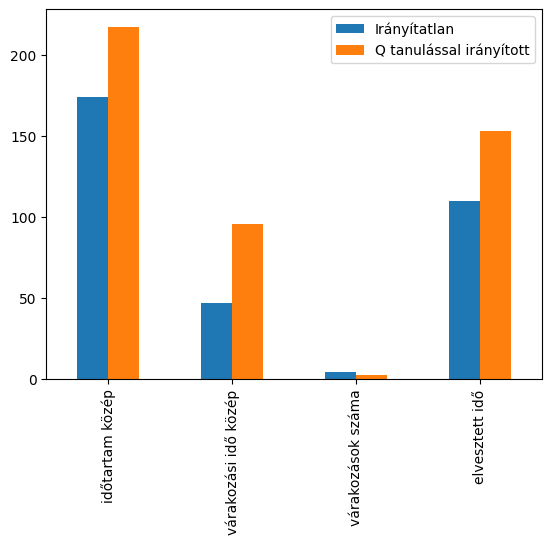

In [18]:
mean_metrics2.plot.bar()

In [19]:
xtree = et.parse("collisionWithoutDistributedControl.xml")
xrootBaseSimulation = xtree.getroot()

In [20]:
rowsBaseSimulation = []

for node in xrootBaseSimulation:
    rowsBaseSimulation.append(node)
len(rowsBaseSimulation)

0

In [21]:
xtree = et.parse("collisionOut4States9.xml")
xrootDistributedSimulation = xtree.getroot()

In [22]:
rowsDistributedSimulation = []

for node in xrootDistributedSimulation:
    rowsDistributedSimulation.append(node)
len(rowsDistributedSimulation)

0

In [24]:
collisions = pd.DataFrame([len(rowsBaseSimulation), len(rowsDistributedSimulation)], columns = ['Ütközések száma'], index =['Referencia Szimuláció', 'Irányított Szimuláció'])
collisions

,Ütközések száma
Referencia Szimuláció,0
Irányított Szimuláció,0
